<a href="https://colab.research.google.com/github/vichacker1234/Curso_mineria_de_datos/blob/main/SOM_victimas_antipersona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis del conjunto de datos (modelo de tipo explicativo)**

In [ ]:
#Importar las librerías más importantes 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import sys
sys.path.insert(0, '../')




import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload

In [ ]:
#Montar el drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Lectura del dataframe de victimas 
victimas_minas_df=pd.read_csv('/content/gdrive/MyDrive/Mineria_de_datos/victimas_MAP_1999-2017.csv')

In [ ]:
# Ver las columnas del dataframe
victimas_minas_df.head()

In [ ]:
victimas_minas_df.shape

(12229, 17)

In [ ]:
#Tamaño del dataframe
print(victimas_minas_df.shape)
#Columnas del dataframe 
victimas_minas_df.columns

(12229, 17)


Index(['departamento', 'codigodanedepartamento', 'municipio',
       'codigodanemunicipio', 'tipoarea', 'sitio', 'ano', 'mes', 'rangoedad',
       'grupoetnico', 'condicion', 'estado', 'genero', 'latitudcabecera',
       'longitudcabecera', 'tipoevento', 'Ubicación'],
      dtype='object')

##**Resumen de los resultados estadísticos**

In [ ]:
#Resumen estadístico del dataframe
victimas_minas_df.info()

#**Tratamiento de las variables cualitativas**

En este apartado se van a seleccionar las variables categórticas para codificarlas usando one-hot

##**Definir las variables categóricas**

In [ ]:
#Definir las variables categóricas
df1_cat=victimas_minas_df[['rangoedad','condicion','tipoarea','grupoetnico','genero']]

In [ ]:
#10 primeros registros de la parte superior
df1_cat.head(10)


##**Tabla cruzada**

In [ ]:
#Primera tabla cruzada
T1=pd.crosstab(victimas_minas_df.departamento,victimas_minas_df.estado,margins_name='Total')

In [ ]:
T1.head(10)

In [ ]:
type(T1)      





pandas.core.frame.DataFrame

In [ ]:
T2=pd.crosstab(victimas_minas_df.departamento,victimas_minas_df.condicion,margins_name='Total')

In [ ]:
T2.head(10)

##**T3**

In [ ]:
T3=pd.crosstab(victimas_minas_df.departamento,victimas_minas_df.tipoarea,margins_name='Total')

In [ ]:
T3

tipoarea,Rural,Urbana
departamento,,
AMAZONAS,4,0
ANTIOQUIA,2581,63
ARAUCA,641,12
ATLANTICO,2,6
BOGOTA DC,20,10
BOLIVAR,632,5
BOYACA,77,1
CALDAS,164,4
CAQUETA,942,7


##**T4**

In [ ]:
T4=pd.crosstab(victimas_minas_df.departamento,victimas_minas_df.grupoetnico)

In [ ]:
T4.head()

grupoetnico,Afrodescendiente,Indigena,No
departamento,,,
AMAZONAS,0,0,4
ANTIOQUIA,7,40,2597
ARAUCA,4,12,637
ATLANTICO,0,0,8
BOGOTA DC,0,0,30


##**T5**

In [ ]:
T5=pd.crosstab(victimas_minas_df.departamento,victimas_minas_df.rangoedad)

In [ ]:
T5.head()

rangoedad,Mayor de 18 años,Menor de 18 años
departamento,,
AMAZONAS,4,0
ANTIOQUIA,2354,290
ARAUCA,599,54
ATLANTICO,1,7
BOGOTA DC,22,8


##**T6**

In [ ]:
T6=pd.crosstab(victimas_minas_df.departamento,victimas_minas_df.genero)

##**Unir los dataset**

In [ ]:
#Unir los dataframes
DF_1=pd.merge(T1,T2,how='inner',on='departamento')

In [ ]:
DF_1.head()

,Herido,Muerto,Civil,Fuerza pública
departamento,,,,
AMAZONAS,2,2,1,3
ANTIOQUIA,2226,418,1213,1431
ARAUCA,535,118,230,423
ATLANTICO,7,1,8,0
BOGOTA DC,19,11,11,19


In [ ]:
#Cruzar con T3
DF_2=pd.merge(T3,DF_1,how='inner',on='departamento')


In [ ]:
DF_2.head()

,Rural,Urbana,Herido,Muerto,Civil,Fuerza pública
departamento,,,,,,
AMAZONAS,4,0,2,2,1,3
ANTIOQUIA,2581,63,2226,418,1213,1431
ARAUCA,641,12,535,118,230,423
ATLANTICO,2,6,7,1,8,0
BOGOTA DC,20,10,19,11,11,19


In [ ]:
#Cruzar con T4
DF_3=pd.merge(T4,DF_2,how='inner',on='departamento')

In [ ]:
DF_3.head()

,Afrodescendiente,Indigena,No,Rural,Urbana,Herido,Muerto,Civil,Fuerza pública
departamento,,,,,,,,,
AMAZONAS,0,0,4,4,0,2,2,1,3
ANTIOQUIA,7,40,2597,2581,63,2226,418,1213,1431
ARAUCA,4,12,637,641,12,535,118,230,423
ATLANTICO,0,0,8,2,6,7,1,8,0
BOGOTA DC,0,0,30,20,10,19,11,11,19


In [ ]:
#cruzar con T5
DF_final=pd.merge(T5,DF_3,how='inner',on='departamento')

In [ ]:
DF_


,Mayor de 18 años,Menor de 18 años,Afrodescendiente,Indigena,No,Rural,Urbana,Herido,Muerto,Civil,Fuerza pública
departamento,,,,,,,,,,,
AMAZONAS,4,0,0,0,4,4,0,2,2,1,3
ANTIOQUIA,2354,290,7,40,2597,2581,63,2226,418,1213,1431
ARAUCA,599,54,4,12,637,641,12,535,118,230,423
ATLANTICO,1,7,0,0,8,2,6,7,1,8,0
BOGOTA DC,22,8,0,0,30,20,10,19,11,11,19


In [ ]:
DF_final.to_excel('Victmas_por_depts.xlsx')

In [ ]:
Data_frame_final.head()

,Mayor de 18 años
departamento,
AMAZONAS,4
ANTIOQUIA,2354
ARAUCA,599
ATLANTICO,1
BOGOTA DC,22


In [ ]:
Regiones_naturales=['AMAZONÍA','ANDINA','ORINOQUÍA','CARIBE','ANDINA','CARIBE','ANDINA','ANDINA','ORINOQUÍA','ORINOQUÍA','PACÍFICA','ANDINA','PACÍFICA','CARIBE','ANDINA','AMAZONÍA','AMAZONÍA','HUILA','CARIBE','CARIBE','ORINOQUÍA','PACÍFICA','ANDINA','AMAZONÍA','ANDINA','ANDINA','ANDINA','CARIBE','ANDINA','PACÍFICA','AMAZONÍA','ORINOQUÍA']

In [ ]:
RN=pd.DataFrame(Regiones_naturales,columns=['Regiones_naturales'])

In [ ]:
pd.DataFrame?

In [ ]:
RN.to_excel('RN.xlsx')

In [ ]:
D1=[[DF_final,RN]]

In [ ]:
D2=pd.DataFrame(D1)

In [ ]:
RN.Regiones_naturales

#**Dataframe final para el mapa autorganizado**

Después de haber construido las tablas cruzadas se obtienen las frecuencias absolutas de cada una de las categorías de las variables de interés. Este conjunto de datos se carga de manera local

In [ ]:
Data_final_victimas_reg=pd.read_excel('/content/Data_frame_final_victimas_regiones.xlsx')

In [ ]:
Data_final_victimas_reg.head(32)

In [ ]:
Data_final_victimas_reg.columns

In [ ]:
Data_final_victimas_reg.head(30)

,departamento,Mayor de 18 años,Menor de 18 años,Afrodescendiente,Indigena,No,Rural,Urbana,Herido,Muerto,Civil,Fuerza pública,Regiones_naturales
0,AMAZONAS,4,0,0,0,4,4,0,2,2,1,3,AMAZONÍA
1,ANTIOQUIA,2354,290,7,40,2597,2581,63,2226,418,1213,1431,ANDINA
2,ARAUCA,599,54,4,12,637,641,12,535,118,230,423,ORINOQUÍA
3,ATLANTICO,1,7,0,0,8,2,6,7,1,8,0,CARIBE
4,BOGOTA DC,22,8,0,0,30,20,10,19,11,11,19,ANDINA
5,BOLIVAR,588,49,0,0,637,632,5,546,91,228,409,CARIBE
6,BOYACA,64,14,0,0,78,77,1,63,15,26,52,ANDINA
7,CALDAS,146,22,0,0,168,164,4,134,34,45,123,ANDINA
8,CAQUETA,892,57,1,3,945,942,7,836,113,220,729,ORINOQUÍA
9,CASANARE,85,5,1,0,89,90,0,61,29,17,73,ORINOQUÍA


In [ ]:
df1_cat.shape[0]

12229

In [ ]:
# size=32
# som = MiniSom(size, size, df1_cat.shape[0],
              # neighborhood_function='gaussian', sigma=1.5,
              # random_seed=1)

##**Importar la librería sklearn**

In [ ]:
import sklearn

In [ ]:
#Herramienta para escalar 
from sklearn.preprocessing import MinMaxScaler

##**Implementación del algoritmo**

In [ ]:
from sklearn.preprocessing import minmax_scale, scale

#**SOM (Mapa auto organizado)**

In [ ]:
#Instalar minisom
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=634c79de994abdd00dc9655468f9c3441b995dd5a435e8803bcceda2c4511f85
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
#Importar MiniSom
from minisom import MiniSom

In [ ]:
var_names = ['Mayor de 18 años', 'Menor de 18 años',
       'Afrodescendiente', 'Indigena', 'No', 'Rural', 'Urbana', 'Herido',
       'Muerto', 'Civil', 'Fuerza pública']

In [ ]:
from sklearn.preprocessing import minmax_scale, scale

In [ ]:
X = Data_final_victimas_reg[var_names].values
X

In [ ]:
X = scale(X)
X

In [ ]:
#Implmentación del algoritmo
#Definir el tamaño de la grilla
size = 3
#Definir la función som
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1.5,
              random_seed=1596)

In [ ]:
#Entrenamiento del algoritmo para som
som.pca_weights_init(X)
som.train_random(X, 1000, verbose=False)


##**Mapa  1 de los departamentos con respecto  la característica grupo étnico**

In [ ]:
#Codificación de los departamentos 
depto_codes = {'ANTIOQUIA': 'ANTIOQUIA','CAUCA':'CAUCA','NARIÑO':'NARIÑO','BOLIVAR':'BOLIVAR','NORTE DE SANTANDER':'NORTE DE SANTANDER','CORDOBA':'CORDOBA','CASANARE':'CASANARE','AMAZONAS':'AMAZONAS','ARAUCA':'ARAUCA','ATLANTICO':'ATLANTICO','BOYACA':'BOYACA','CALDAS':'CALDAS',
               'CAQUETA':'CAQUETA','CAUCA':'CAUCA','CHOCO':'CHOCO','CUNDINAMARCA':'CUNDINAMARCA','GUAINIA':'GUAINIA','LA GUAJIRA':'LA GUAJIRA','HUILA':'HUILA','MAGDALENA':'MAGDALENA','META':'META','NARIÑO':'NARIÑO','NORTE DE SANTANDER':'NORTE DE SANTANDER','PUTUMAYO':'PUTUMAYOT','BOGOTA DC':'BOGOT DC','QUINDIO':'QUINDIO','RISARALDA':'RISARALDA','SANTANDER':'SANTANDER','SUCRE':'SUCRE','TOLIMA':'TOLIMA','VALLE DEL CAUCA':'VALLE DEL CAUCA','VAUPES':'VAUPES','VICHADA':'VICHADA','CAQUETA':'CAQUETA','GUAVIARE':'GUAVIARE','CESAR':'CESAR'}

In [ ]:
#Tamaño de la lista de elemntos claves
len(depto_codes.keys())


32

In [ ]:
category_color_ge = {'AMAZONÍA': 'green',
                  'ANDINA': 'blue','CARIBE':'red','PACÍFICA':'purple','ORINOQUÍA':'black'}

In [ ]:
dept_colors_dict = {c: category_color_ge[dm] for c, dm in zip(Data_final_victimas_reg.departamento,Data_final_victimas_reg.Regiones_naturales)}

In [ ]:
dept_colors_dict.items()

dict_items([('AMAZONAS', 'green'), ('ANTIOQUIA', 'blue'), ('ARAUCA', 'black'), ('ATLANTICO', 'red'), ('BOGOTA DC', 'blue'), ('BOLIVAR', 'red'), ('BOYACA', 'blue'), ('CALDAS', 'blue'), ('CAQUETA', 'black'), ('CASANARE', 'black'), ('CAUCA', 'purple'), ('CESAR', 'blue'), ('CHOCO', 'purple'), ('CORDOBA', 'red'), ('CUNDINAMARCA', 'blue'), ('GUAINIA', 'green'), ('GUAVIARE', 'green'), ('HUILA', 'blue'), ('LA GUAJIRA', 'red'), ('MAGDALENA', 'red'), ('META', 'black'), ('NARIÑO', 'purple'), ('NORTE DE SANTANDER', 'blue'), ('PUTUMAYO', 'green'), ('QUINDIO', 'blue'), ('RISARALDA', 'blue'), ('SANTANDER', 'blue'), ('SUCRE', 'red'), ('TOLIMA', 'blue'), ('VALLE DEL CAUCA', 'purple'), ('VAUPES', 'green'), ('VICHADA', 'black')])

In [ ]:
def shorten_dept(c):
    if len(c) > 3:
        return depto_codes[c]
    else:
        return c



In [ ]:
X.shape

(32, 11)

In [ ]:
dept_map.items()

dict_items([((2, 2), Counter({'AMAZONAS': 1, 'ATLANTICO': 1, 'BOGOTA DC': 1, 'BOYACA': 1, 'CASANARE': 1, 'GUAINIA': 1, 'LA GUAJIRA': 1, 'MAGDALENA': 1, 'QUINDIO': 1, 'RISARALDA': 1, 'SUCRE': 1, 'VAUPES': 1, 'VICHADA': 1})), ((0, 0), Counter({'ANTIOQUIA': 1})), ((0, 2), Counter({'ARAUCA': 1, 'BOLIVAR': 1, 'TOLIMA': 1})), ((2, 1), Counter({'CALDAS': 1, 'CORDOBA': 1, 'CUNDINAMARCA': 1})), ((0, 1), Counter({'CAQUETA': 1, 'META': 1, 'NORTE DE SANTANDER': 1})), ((1, 1), Counter({'CAUCA': 1, 'GUAVIARE': 1, 'PUTUMAYO': 1})), ((1, 2), Counter({'CESAR': 1, 'HUILA': 1, 'SANTANDER': 1, 'VALLE DEL CAUCA': 1})), ((2, 0), Counter({'CHOCO': 1})), ((1, 0), Counter({'NARIÑO': 1}))])

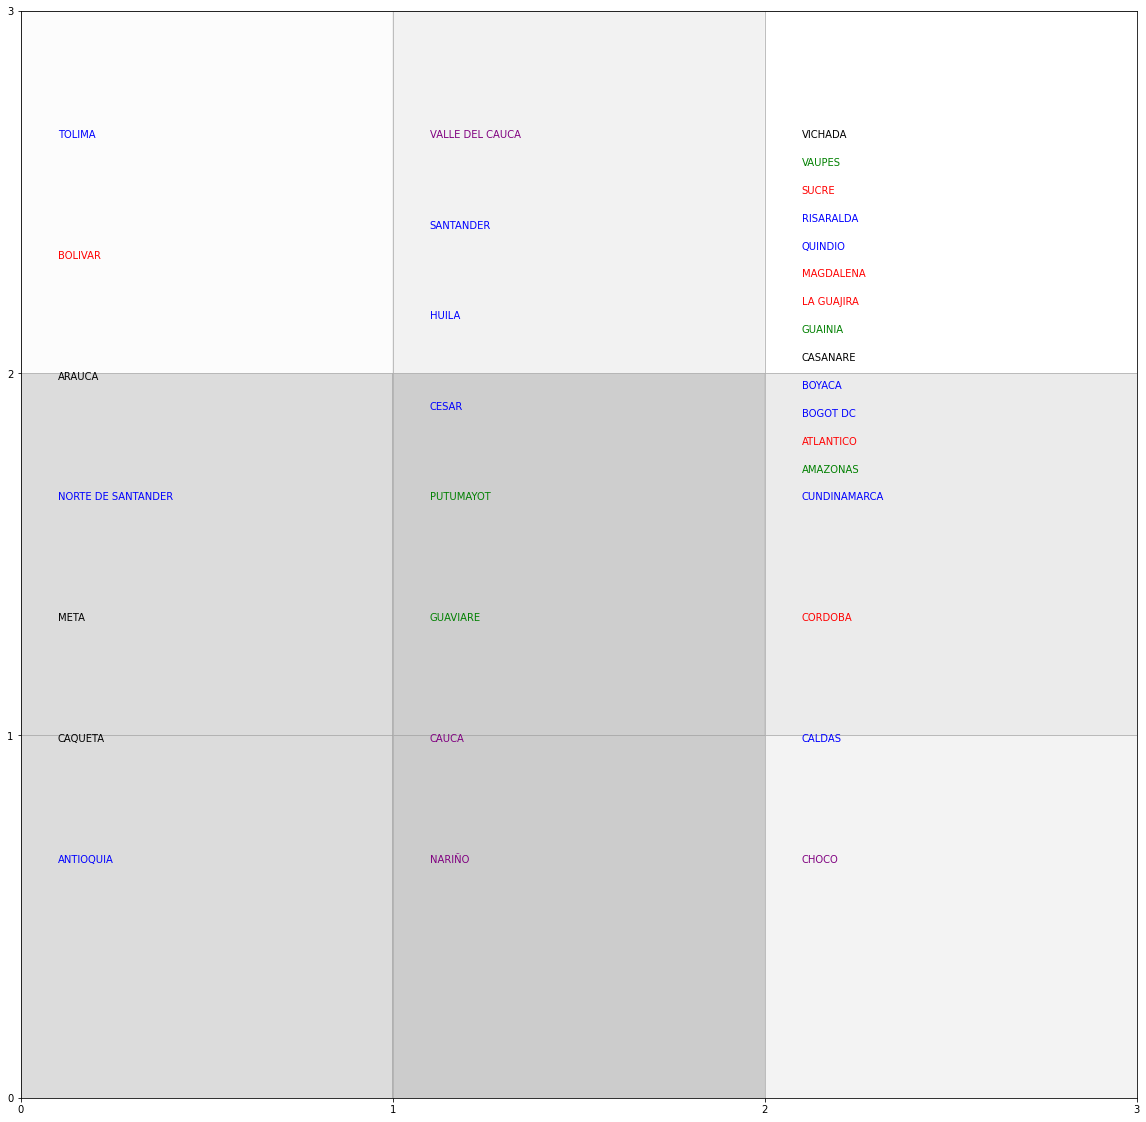

In [ ]:
dept_map = som.labels_map(X,Data_final_victimas_reg.departamento)
    
plt.figure(figsize=(20, 20))
for p, d in dept_map.items():
    depts = list(d)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(depts):
        off_set = (i+1)/len(depts) - 0.05
        plt.text(x, y+off_set,shorten_dept(c), color=dept_colors_dict[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()


plt.show()

In [ ]:
plt.savefig('SOM_departamentos.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
depto_codes

{'ANTIOQUIA': 'ANTIOQUIA',
 'CAUCA': 'CAUCA',
 'NARIÑO': 'NARIÑO',
 'BOLIVAR': 'BOLIVAR',
 'NORTE DE SANTANDER': 'NORTE DE SANTANDER',
 'CORDOBA': 'CORDOBA',
 'CASANARE': 'CASANARE',
 'AMAZONAS': 'AMAZONAS',
 'ARAUCA': 'ARAUCA',
 'ATLANTICO': 'ATLANTICO',
 'BOYACA': 'BOYACA',
 'CALDAS': 'CALDAS',
 'CAQUETA': 'CAQUETA',
 'CHOCO': 'CHOCO',
 'CUNDINAMARCA': 'CUNDINAMARCA',
 'GUAINIA': 'GUAINIA',
 'LA GUAJIRA': 'LA GUAJIRA',
 'HUILA': 'HUILA',
 'MAGDALENA': 'MAGDALENA',
 'META': 'META',
 'PUTUMAYO': 'PUTUMAYOT',
 'BOGOTA DC': 'BOGOT DC',
 'QUINDIO': 'QUINDIO',
 'RISARALDA': 'RISARALDA',
 'SANTANDER': 'SANTANDER',
 'SUCRE': 'SUCRE',
 'TOLIMA': 'TOLIMA',
 'VALLE DEL CAUCA': 'VALLE DEL CAUCA',
 'VAUPES': 'VAUPES',
 'VICHADA': 'VICHADA',
 'GUAVIARE': 'GUAVIARE',
 'CESAR': 'CESAR'}

##**Mapa 2 de los departametnos con respecto a la condicion**

In [ ]:
X

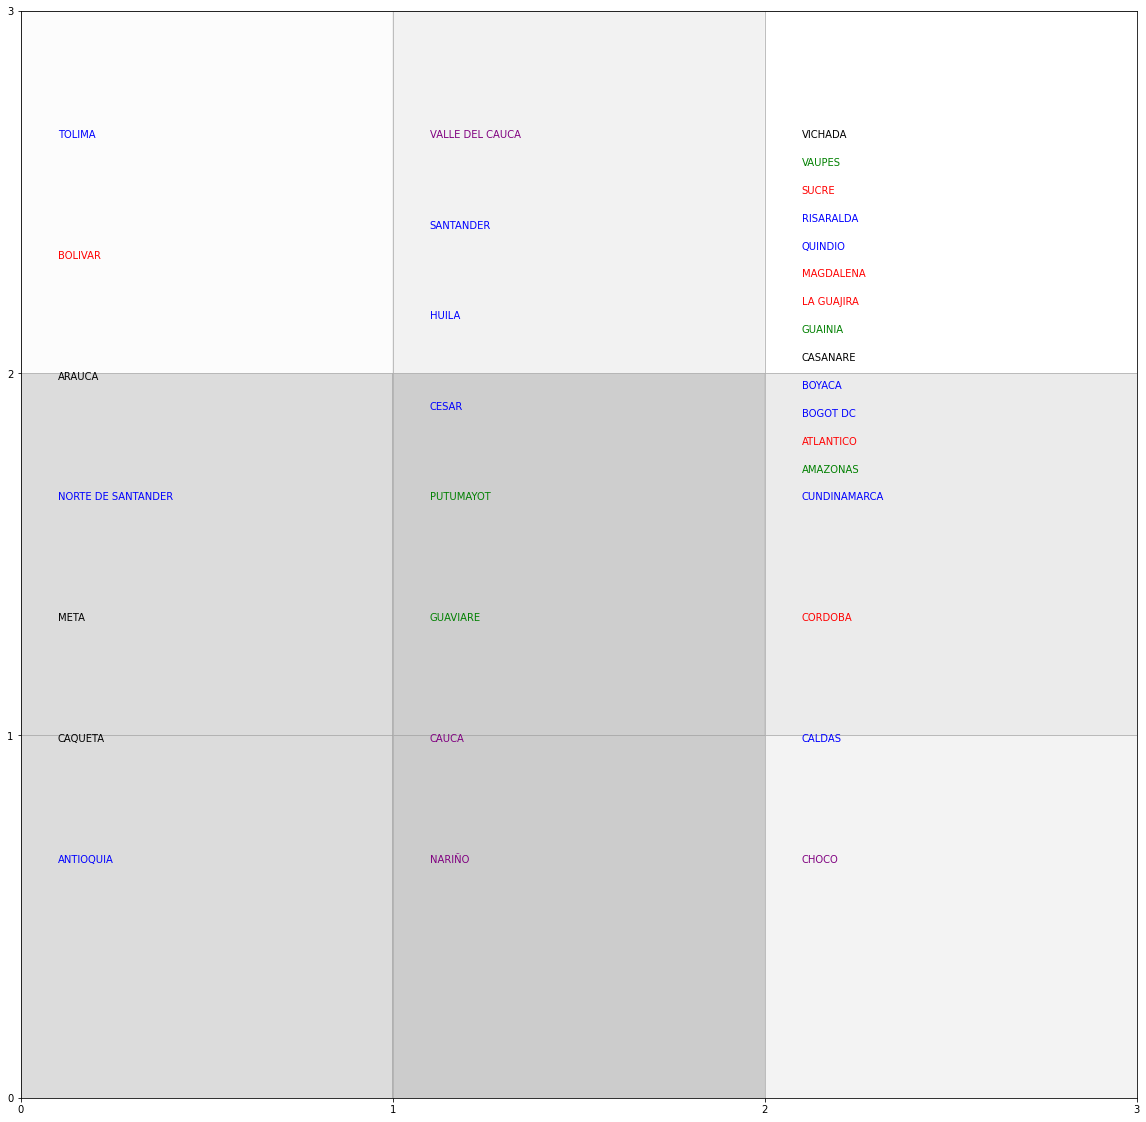

In [ ]:
dept_map = som.labels_map(X,Data_final_victimas_reg.departamento)
    
plt.figure(figsize=(20, 20))
for p, d in dept_map.items():
    depts = list(d)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(depts):
        off_set = (i+1)/len(depts) - 0.05
        plt.text(x, y+off_set,shorten_dept(c), color=dept_colors_dict[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()


plt.show()



In [ ]:
plt.savefig('SOM1.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
depto_codes

##**Planos de características**

In [ ]:
var_quali_names = ['RANGO DE EDAD', 'CONDICIÓN', 'TIPO DE ÁREA', 'GRUPO ÉTNICO', 'GÉNERO']

In [ ]:
var_quali_names = ['grupoetnico']

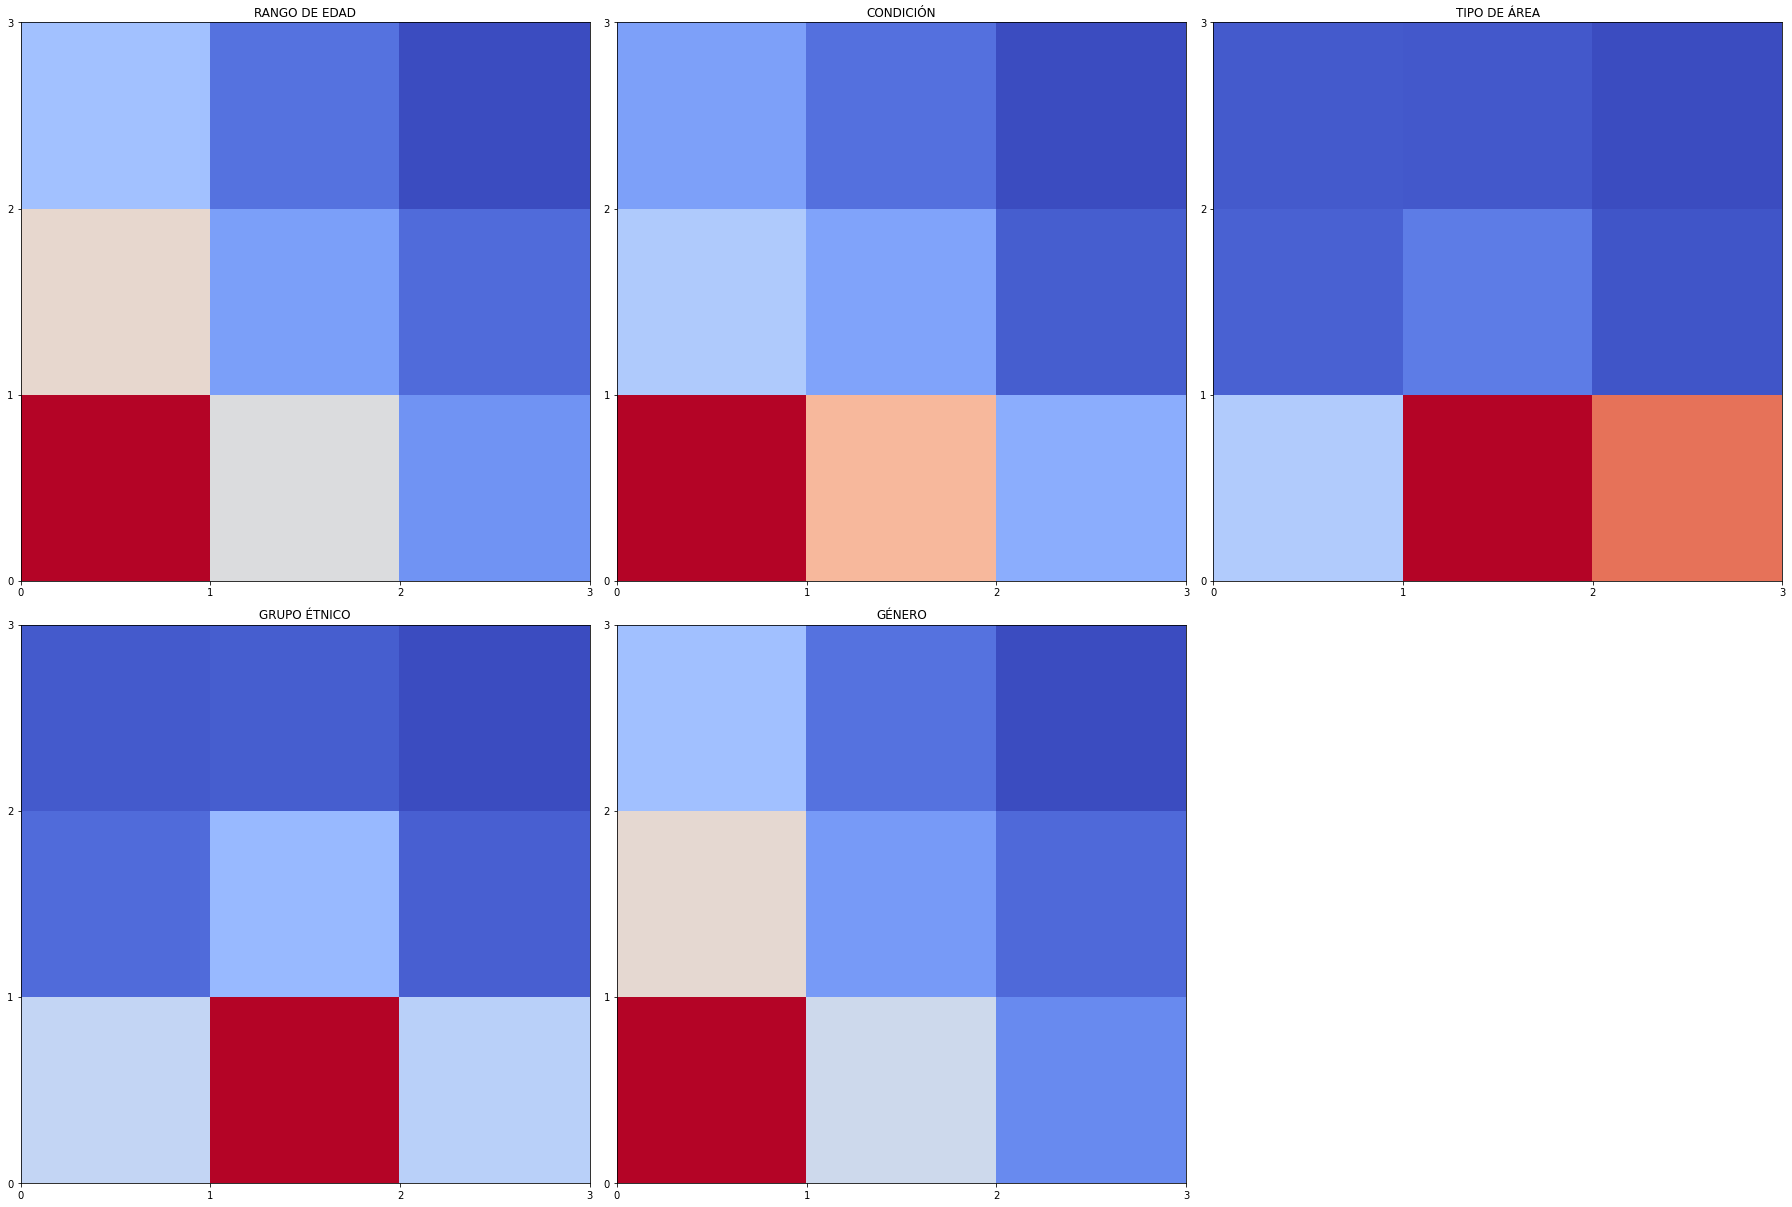

In [ ]:
#Planos de características
W = som.get_weights()
plt.figure(figsize=(25, 25))
for i, f in enumerate(var_quali_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()


##**Interpretación del mapa del mapa de calor de características**


* Dentro de la variable del rango de edad, los departamentos de Antioquía y Caquetá tienen un mayor porcentaje de víctimas mayores de 18 años en comparación con los demás departamentos

* Dentro de la variable de condición, Antioquía y Caquetá tiene un mayor de porcentaje de heridos con respecto a los demás departamentos
* En la variable tipo de área se puede notar que hay un gran porcentaje de víctimas de las zonas rurales de Nariño y Cauca en comparación con los demás departamentos donde se presentan más  heridos en el  área urbana
*  Dentro de la variable grupo étnico se puede apreciar que existe un gran porcentaje de víctimas indígenas pertenecientes a los departamentos de Cauca y Nariño
* Finalmente en género se puede evidenciar que existe un gran porcentaje de víctimas que son hombres  y se concentran sobretodo en lo departamentos de Antioquía y Caquetá

In [ ]:
plt.savefig('heatmap.jpg')

<Figure size 432x288 with 0 Axes>